<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cost (Loss) Function**

In [1]:
!pip install livelossplot --quiet
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print(tf.__version__)

2.3.0


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

$\min _{W}\left\{L(W):=\frac{1}{m} \sum_{i=1}^{m} \ell\left(W ; x_{i}, y_{i}\right)+\lambda r(W)\right\}$

Complete list of [Loss / Cost Functions in TF](https://www.tensorflow.org/api_docs/python/tf/keras/losses/)

https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

https://medium.com/@phuctrt/loss-functions-why-what-where-or-when-189815343d3f

https://towardsdatascience.com/what-is-loss-function-1e2605aeb904

### **Cost Functions for Regression**

![xx](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/regression_loss.PNG)

**Mean Squared Error (L2 or Quadratic Loss)**

In [ ]:
loss = 'mse'

* [Wikipedia](https://de.m.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate)

**Mean Absolute Error (L1 Loss)**

In [ ]:
loss = 'mae'

* Computes the mean of absolute difference between labels and predictions.

**Huber Loss (Smooth Mean Absolute Error)**

In [ ]:
loss = tf.keras.losses.Huber(
    delta=1.0, reduction=losses_utils.ReductionV2.AUTO, name='huber_loss'
)

**Log-Cosh Loss**

In [6]:
loss = tf.keras.losses.LogCosh()

* Log-cosh is another function used in regression tasks that’s smoother than L2
* Log-cosh is the logarithm of the hyperbolic cosine of the prediction error.
* [Wiki Hyperbolic Functions](https://en.m.wikipedia.org/wiki/Hyperbolic_functions), [TF Class](https://www.tensorflow.org/api_docs/python/tf/keras/losses/LogCosh)

**Quantile Loss (Pinball Loss)**

In [ ]:
loss = tfa.losses.PinballLoss(tau=.1)

![xx](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Pinball_Loss_Function.svg/320px-Pinball_Loss_Function.svg.png)

*Pinball-Verlustfunktion mit 
τ
=0,9. Für 
ε
<
0 beträgt der Fehler 
−
0
,
1
ε, für 
ε
≥
0 beträgt er 
0
,
9
ε.*

* estimates conditional “quantile” of a response variable given certain values of predictor variables
* is an extension of MAE (when quantile is 50th percentile, it’s MAE)
* Im Gegensatz zur Kleinste-Quadrate-Schätzung, die den Erwartungswert der Zielgröße schätzt, ist die Quantilsregression dazu geeignet, ihre Quantile zu schätzen. 
* [Wikipedia](https://de.m.wikipedia.org/wiki/Quantilsregression), [TF Class](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/PinballLoss) & [TF Function](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/pinball_loss)

### **Cost Functions for Classification**

In [2]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss = 'sparse_categorical_crossentropy'

In [ ]:
loss = kullback leibler

### **Define Model & Run**

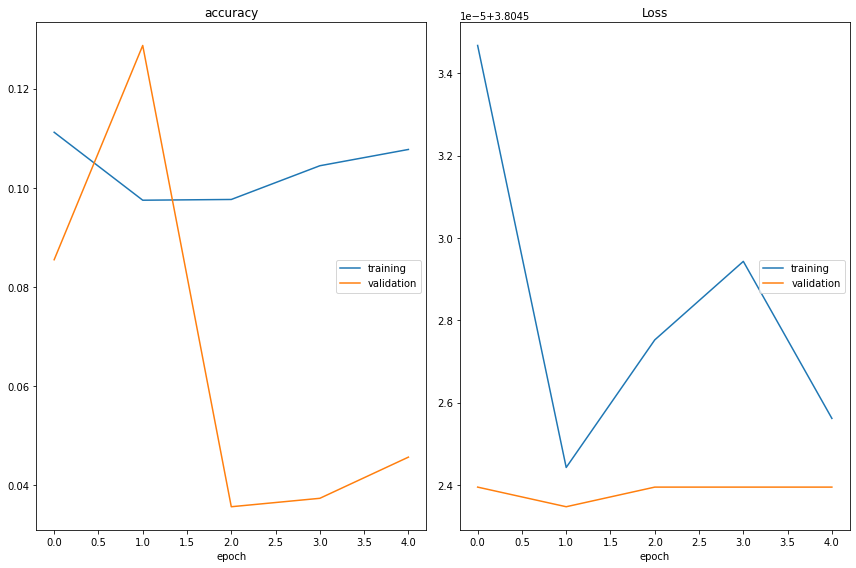

accuracy
	training         	 (min:    0.097, max:    0.111, cur:    0.108)
	validation       	 (min:    0.036, max:    0.129, cur:    0.046)
Loss
	training         	 (min:    3.805, max:    3.805, cur:    3.805)
	validation       	 (min:    3.805, max:    3.805, cur:    3.805)
1875/1875 [==============================] - 7s 4ms/step - loss: 3.8045 - accuracy: 0.1077 - val_loss: 3.8045 - val_accuracy: 0.0457


In [7]:
# Define Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer='adam', 
              loss=loss, 
              metrics=['accuracy'])

# Train Model
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKerasTF()],
          verbose=1)